In [220]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [231]:
train = pd.read_csv("train.csv")

In [232]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [233]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Checking Missing Values

In [234]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

## imputate missing value in Electrical

In [235]:
train[train['Electrical'].isnull().values==True]# locate missing values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


Since the price is reasonable, we just set it as missing value and fill it with 0

In [236]:
train['Electrical'] = train['Electrical'].fillna(0)

## imputate missing values associated with basement

For basement data, they are dependent with each other, nan in BsmtExposure means the house doesn't have a basement, we just fill the missing value with None

In [237]:
train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

For row 948, the Basement exposure is NaN, which menas no basement. However, it has basment fintype, condition and quality. We assume the house has a basement, but without exposure. Thus, we change the NaN to 'No'.

In [238]:
train[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']][train['BsmtExposure'].isnull().values==True]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [239]:
train.at[948,'BsmtExposure']='No'

The same applies to variable "BsmtFinType2", accroding to data description, "NaN" means no basement, however, the value in Basementexposure is "No", which means the house has a basement but without multiple types. Thus, we fill it with Unf, which is unfinished. (there is no N/A or similar values corresponding to this situation)

In [241]:
train[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']][train['BsmtFinType2'].isnull().values==True]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,No,NaN,GLQ,TA,Gd
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


In [242]:
train.at[332,'BsmtFinType2']='Unf'

For other variables associated with basement, we will impute with "None", which means no basement.

In [243]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

## imputate missing values associated with garage

Variable "GarageCond, GarageType, GarageYrBlt, GarageFinish, GarageQual" , they are dependent with each other and have the same number of missing values. We will fill it with "None", which means no garage.

In [244]:
for col in ('GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual'):
    train[col] = train[col].fillna('None')

## imputate missing values associated with Masonry

Same applies to variable MasVnrArea and MasVnrType

In [245]:
for col in ('MasVnrArea','MasVnrType'):
    train[col] = train[col].fillna('None')

## imputate missing values in Lotfrontage

For missing values in lotfrontage, fill it wiht 0

In [246]:
train['LotFrontage'] = train['LotFrontage'].fillna(0)

## imputate missing values associated with fireplace

There are two variables associated with fireplace, which are Fireplaces and FireplaceQu. Fireplaces is the number of fireplaces, which has no missing values. For thoes who have missing vlaues in FireplaceQu, they have zero Fireplaces. Thus, we can fill it with "None, which means no fire places.

In [247]:
train[['Fireplaces','FireplaceQu']][train['FireplaceQu'].isnull().values==True]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


In [248]:
train['FireplaceQu'] = train['FireplaceQu'].fillna("None")

## imputate missing values associated with fence

The missing value in Fence means no fence, so we just fill it with "None".

In [249]:
train['Fence'] = train['Fence'].fillna("None")

## imputate missing values in alley

The missing value in alley means no alley access, so we just fill it with "None".

In [250]:
train['Alley'] = train['Alley'].fillna("None")

## imputate missing values in miscfeature

Fill "None" for missing values in MiscFeature

In [251]:
train['MiscFeature'] = train['MiscFeature'].fillna("None")

## imputate missing values associated with pool

Fill "None" for missing values in PoolQC

In [252]:
train['PoolQC'] = train['PoolQC'].fillna("None")

# Data Correlation

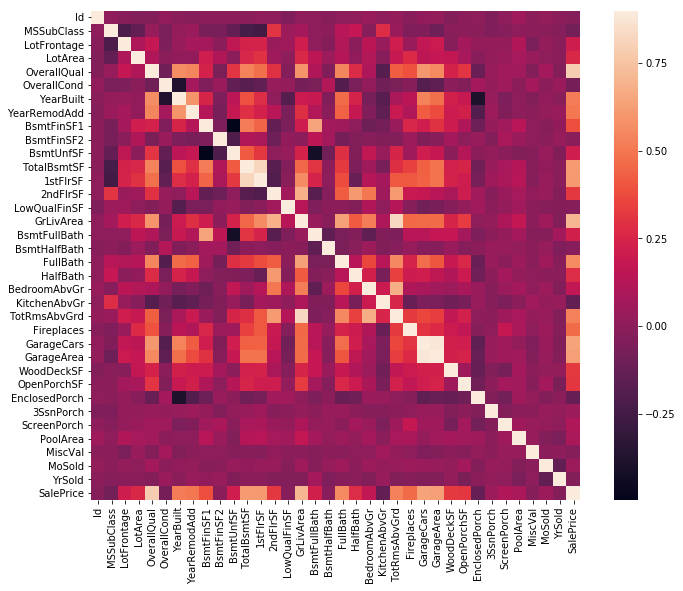

In [254]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)